In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import os
import numpy as np
import datetime as dt
%config IPCompleter.greedy=True

### Table of Contents

* [Data Collection](#data_collection)
    * [Data Loading](#data_load)
        * [First Inspection](#first_insp)
    * [Data Joining](#data_join)
* [Data Definition](#data_definition)
    * [Participants Category](#participant_cat)
    * [Looking at protester demands](#protester_dem1)
        * [Combining protester demands](#demand_combo)
        * [Making new demand columns 0/1](#bool_demand)
    * [Looking at state response](#state_resp1)
        * [Combining state responses](#response_combo)
        * [Making new response columns 0/1](#bool_response)
        * [State First and Last response](#first_last)
    * [Counting demands and responses](#dem_res_count)
    * [Setting dates](#dtype_date)
    * [Looking at location](#location)
    * [Looking at protester violence](#violence)
* [Data Cleaning](#data_cleaning)

### Data Collection <a class="anchor" id="data_collection"></a>

#### Data loading <a class="anchor" id="data_load"></a>

In [2]:
df = pd.read_csv("../raw_data/mmALL_073120_csv.csv")

#### First Inspection <a class="anchor" id="first_insp"></a>

In [3]:
df.head(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17145 non-null  int64  
 1   country                17145 non-null  object 
 2   ccode                  17145 non-null  int64  
 3   year                   17145 non-null  int64  
 4   region                 17145 non-null  object 
 5   protest                17145 non-null  int64  
 6   protestnumber          17145 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15758 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [5]:
df.shape

(17145, 31)

In [6]:
df.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [7]:
df.describe()

,id,ccode,year,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence
count,1.714500e+04,17145.000000,17145.000000,17145.000000,17145.000000,15239.000000,15239.000000,15239.000000,15239.000000,15239.000000,15239.000000,15758.000000
mean,4.380888e+09,437.888189,2006.171654,0.888831,7.406299,15.455935,6.227836,2006.326465,15.580616,6.243520,2006.329221,0.256060
std,2.320550e+09,232.054953,8.987378,0.314351,11.854041,8.817037,3.461912,8.958007,8.803944,3.461745,8.959254,0.436469
min,2.019900e+08,20.000000,1990.000000,0.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,1990.000000,0.000000
25%,2.202010e+09,220.000000,1998.000000,1.000000,1.000000,8.000000,3.000000,1999.000000,8.000000,3.000000,1999.000000,0.000000
50%,4.342008e+09,434.000000,2007.000000,1.000000,3.000000,15.000000,6.000000,2007.000000,16.000000,6.000000,2007.000000,0.000000
75%,6.512005e+09,651.000000,2014.000000,1.000000,8.000000,23.000000,9.000000,2014.000000,23.000000,9.000000,2014.000000,1.000000
max,9.102020e+09,910.000000,2020.000000,1.000000,143.000000,31.000000,12.000000,2020.000000,31.000000,12.000000,2020.000000,1.000000


Exploring Protester Demands and State Responses to get a feel for any clean up that will be needed to use these features/target variables. 

In [8]:
df.iloc[:,[18,19,20,21]].describe() #Protester demands

,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4
count,15238,2977,383,831
unique,7,7,7,7
top,"political behavior, process","political behavior, process","price increases, tax policy",.
freq,9680,1004,111,796


In [9]:
df.iloc[:,[22,23,24,25,26,27,28]].describe() #State responses

,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7
count,15208,2888,930,244,849,16,920
unique,7,7,7,6,7,5,5
top,ignore,arrests,arrests,accomodation,.,accomodation,.
freq,8239,764,231,65,796,9,913


In [10]:
df[['participants', 'participants_category']].describe()

,participants,participants_category
count,15746,9887
unique,781,6
top,100s,100-999
freq,1330,3204


In [11]:
df['participants'].value_counts()

100s              1330
1000s             1187
50+               1138
50                1005
1000               978
                  ... 
100000-200000        1
20000-60000          1
150-300              1
193                  1
over a million       1
Name: participants, Length: 781, dtype: int64

#### Data joining <a class="anchor" id="data_join"></a>

The participants column did not only solely contain integers i.e 100s. In order to clean this up, I considered participants category when available and chose the mid range of the category if available i.e if participants was noted as 100s, and participant category is 100-999, new participants_int number is 450 . Otherwise the lowest notated number i.e if participants was noted as 100s, and participant category was not available, participant_int is 100.
I made this data set available in [Data World](https://data.world/montealj/mass-mobilization-participant-data)

In [12]:
participants_int = pd.read_csv('../raw_data/mm_participants_id_updated.csv', index_col='id')

In [13]:
df = pd.merge(df, participants_int, on=['id'])

In [44]:
df['participants_int'].head()

0    1500.0
1    1000.0
2     500.0
3     550.0
4     950.0
Name: participants_int, dtype: float64

### Data Definition <a class="anchor" id="data_definition"></a>

#### Participants Category <a class="anchor" id="participant_cat"></a>

Participants Category was not originally being captured. This field was introduced part way through the data collection and thus is not available for every observation. However, using the participant_int values created and merged in the data joining section, I was able to fill in this column and use it as a feature. 

In [15]:
pc_ranges= [0,50,99,999,1999,4999,10000,np.inf]
pc_names=['0-50','50-99','100-999','1000-1999','2000-4999','5000-10000','>10000']
df['new_participants_category']= pd.cut(df['participants_int'], bins=pc_ranges, labels = pc_names)
df[['new_participants_category', 'participants_int']]

,new_participants_category,participants_int
0,1000-1999,1500.0
1,1000-1999,1000.0
2,100-999,500.0
3,100-999,550.0
4,100-999,950.0
...,...,...
16301,50-99,75.0
16302,50-99,75.0
16303,100-999,100.0
16304,NaN,NaN


#### Looking at protester demands <a class="anchor" id="protester_dem1"></a>

Upon first inspection, I noticed that some protestor demands had a "." 
In this section I worked to replace "." in the demands and state responses columns. Note, the update did not translate to the df, so It will be merged in the Data Cleaning section. 

In [16]:
demands = df[['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']]

In [17]:
demands.head()

,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4
0,"political behavior, process",labor wage dispute,NaN,NaN
1,"political behavior, process",NaN,NaN,NaN
2,"political behavior, process",NaN,NaN,NaN
3,land farm issue,NaN,NaN,NaN
4,"political behavior, process",NaN,NaN,NaN


In [18]:
demands.info() #counts are not accurate since "." is interpreted as a string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16306 entries, 0 to 16305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   protesterdemand1  14510 non-null  object
 1   protesterdemand2  2675 non-null   object
 2   protesterdemand3  315 non-null    object
 3   protesterdemand4  817 non-null    object
dtypes: object(4)
memory usage: 637.0+ KB


In [19]:
demands['protesterdemand4'].value_counts() 

.                              796
police brutality                 7
removal of politician            4
land farm issue                  3
political behavior, process      3
labor wage dispute               2
price increases, tax policy      2
Name: protesterdemand4, dtype: int64

In [20]:
#stripping white space
demands = demands.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [21]:
#replacing "." with NAN
demands = demands.apply(lambda x: x.replace('\.', np.NaN, regex= True) if x.dtype == "object" else x)

In [22]:
demands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16306 entries, 0 to 16305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   protesterdemand1  14510 non-null  object
 1   protesterdemand2  2675 non-null   object
 2   protesterdemand3  315 non-null    object
 3   protesterdemand4  21 non-null     object
dtypes: object(4)
memory usage: 637.0+ KB


In [23]:
demands['protesterdemand4'].value_counts()
#confirming it worked
#no more "."

police brutality               7
removal of politician          4
land farm issue                3
political behavior, process    3
labor wage dispute             2
price increases, tax policy    2
Name: protesterdemand4, dtype: int64

In [24]:
df['protesterdemand4'].value_counts()
#change did not apply to the original df
#Merging demands and df and dropping  under cleanup section

.                              796
police brutality                 7
removal of politician            4
land farm issue                  3
political behavior, process      3
labor wage dispute               2
price increases, tax policy      2
Name: protesterdemand4, dtype: int64

#### Combining protester demands into 1 column <a class="anchor" id="demand_combo"></a>

It might be useful to see if a combination of demands is correlated to a violent state response. In this section, I will combine each demand per obersation into one field to later explore as a feature.  

In [25]:
#Note: Protester demands are uniform across columns
df['demand_combo'] = demands.stack().groupby(level=0).apply('; '.join)

In [39]:
df['demand_combo'].head()

0    political behavior, process; labor wage dispute
1                        political behavior, process
2                        political behavior, process
3                                    land farm issue
4                        political behavior, process
Name: demand_combo, dtype: object

#### Making new columns for each demand 0/1 <a class="anchor" id="bool_demand"></a>

In this section I created boolean columns that describe the demand(s)for the observation and type casted them as categories. 

In [29]:
df['labor_wage_dispute'] = df.demand_combo.str.contains('labor wage dispute').astype('category')

In [30]:
df['land_farm_issue'] = df.demand_combo.str.contains('land farm issue').astype('category')

In [31]:
df['police_brutality'] = df.demand_combo.str.contains('police brutality').astype('category')

In [32]:
df['political_behavior'] = df.demand_combo.str.contains('political behavior, process').astype('category')

In [33]:
df['price_increases_tax_policy'] = df.demand_combo.str.contains('price increases, tax policy').astype('category')

In [34]:
df['removal_of_politician'] = df.demand_combo.str.contains('removal of politician').astype('category')

In [35]:
df['social_restrictions'] = df.demand_combo.str.contains('social restrictions').astype('category')

In [46]:
df.iloc[:,[34,35,36,37,38,39,40]]

,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior,price_increases_tax_policy,removal_of_politician,social_restrictions
0,True,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
16301,False,True,False,True,False,False,False
16302,False,False,False,True,False,False,False
16303,False,False,False,True,False,False,False
16304,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looking at state response <a class="anchor" id="state_resp1"></a>

Similarly to the protester demands, the state response columns also responses noted with a "." 
In this section I worked to replace "." in the state responses columns. Note, the update did not translate to the df, so It will be merged in the Data Cleaning section.

In [47]:
responses = df[['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7']]

In [48]:
responses.head()

,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7
0,ignore,NaN,NaN,NaN,NaN,NaN,NaN
1,ignore,NaN,NaN,NaN,NaN,NaN,NaN
2,ignore,NaN,NaN,NaN,NaN,NaN,NaN
3,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
4,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN


In [52]:
#looking to see if state response 1+ has data if state response 1 is NaN
responses[responses['stateresponse1'].isnull()] 

,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,NaN,NaN,NaN,NaN,NaN,NaN,.
16304,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.iloc[16305] #this will be my test row

id                                  9102019000
country                       Papua New Guinea
ccode                                      910
year                                      2019
region                                 Oceania
protest                                      0
protestnumber                                0
startday                                   NaN
startmonth                                 NaN
startyear                                  NaN
endday                                     NaN
endmonth                                   NaN
endyear                                    NaN
protesterviolence                          NaN
location                                   NaN
participants_category                      NaN
participants                               NaN
protesteridentity                          NaN
protesterdemand1                           NaN
protesterdemand2                           NaN
protesterdemand3                           NaN
protesterdema

In [53]:
#stripping white space
responses = responses.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [54]:
#replacing "." with NAN
responses = responses.replace('\.', np.NaN, regex = True) 

In [55]:
responses.iloc[16305]
#confirming it worked in responses data frame(not df)

stateresponse1    NaN
stateresponse2    NaN
stateresponse3    NaN
stateresponse4    NaN
stateresponse5    NaN
stateresponse6    NaN
stateresponse7    NaN
Name: 16305, dtype: object

#### Combining state responses into 1 column <a class="anchor" id="response_combo"></a>

It might be useful to see if a combination of responses is correlated to a violent state response. In this section, I will combine each response per obersation into one field to later explore as a feature.

In [57]:
#Note: State responses are uniform across columns
df['response_combo'] = responses.stack().groupby(level=0).apply(','.join)

In [62]:
df['response_combo'].head()

0                                  ignore
1                                  ignore
2                                  ignore
3                            accomodation
4    crowd dispersal,arrests,accomodation
Name: response_combo, dtype: object

#### Making new columns for each response 0/1 <a class="anchor" id="bool_response"></a>

In this section I created boolean columns that describe the state response(s)for the observation and type casted them as categories.

In [64]:
df['accomodation'] = df.response_combo.str.contains('accomodation').astype('category')

In [65]:
df['arrests'] = df.response_combo.str.contains('arrests').astype('category')

In [66]:
df['beatings'] = df.response_combo.str.contains('beatings').astype('category')

In [67]:
df['crowd_dispersal'] = df.response_combo.str.contains('crowd dispersal').astype('category')

In [68]:
df['ignore'] = df.response_combo.str.contains('ignore').astype('category')

In [69]:
df['killings'] = df.response_combo.str.contains('killings').astype('category')

In [70]:
df['shootings'] = df.response_combo.str.contains('shootings').astype('category')

In [72]:
df.iloc[:,[42,43,44,45,46,47,48]]

,accomodation,arrests,beatings,crowd_dispersal,ignore,killings,shootings
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False
4,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...
16301,True,False,False,False,False,False,False
16302,False,False,False,True,False,False,False
16303,False,False,False,False,True,False,False
16304,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### State First and Last response <a class="anchor" id="first_last"></a>

Another set of potential features are the first and last state response. In this section I created a column with this entry and will later explore as features. 

In [74]:
state_response = df['response_combo']

In [75]:
state_response.head()

0                                  ignore
1                                  ignore
2                                  ignore
3                            accomodation
4    crowd dispersal,arrests,accomodation
Name: response_combo, dtype: object

In [77]:
df['first_response']= df['response_combo'].str.split(',').str[0]

In [79]:
df['first_response'].value_counts()

ignore             7933
crowd dispersal    3611
arrests            1049
accomodation        937
shootings           415
beatings            301
killings            236
Name: first_response, dtype: int64

In [80]:
df['last_response']= df['response_combo'].str.split(',').str[-1]

In [81]:
df['last_response'].value_counts()

ignore             7722
crowd dispersal    2922
accomodation       1378
arrests            1376
killings            439
beatings            367
shootings           278
Name: last_response, dtype: int64

#### Counting demands and responses <a class="anchor" id="dem_res_count"></a>

Another potential feature is the number of demands and responses per observation. Counting them and creating new columns to explore later. 

In [82]:
new_demands = df[['labor_wage_dispute','land_farm_issue','police_brutality','political_behavior','price_increases_tax_policy','removal_of_politician','social_restrictions']]

In [83]:
df['demands_count'] = new_demands.sum(axis=1).astype('int')

In [84]:
new_responses = df[['accomodation','arrests','beatings','crowd_dispersal','ignore', 'killings','shootings']]

In [85]:
df['responses_count'] = new_responses.sum(axis=1).astype('int')

In [88]:
df[['demands_count','responses_count']].head()

,demands_count,responses_count
0,2,1
1,1,1
2,1,1
3,1,1
4,1,3


In [91]:
#df[['id','participants','participants_category','new_participants_category', 'participants_int','demands_count', 'responses_count' ]]

In [90]:
(df['responses_count'] > 0).mean()

0.8881393352140317

#### Setting dates <a class="anchor" id="dtype_date"></a>

The start and end date where noted for each observation. Setting them up in the df as dates. 

In [92]:
df['start_date'] = pd.to_datetime((df.startyear*10000+df.startmonth*100+df.startday),format='%Y%m%d')

In [93]:
df['end_date'] = pd.to_datetime((df.endyear*10000+df.endmonth*100+df.endday),format='%Y%m%d')

In [95]:
df[['start_date','end_date']]

,start_date,end_date
0,1990-01-15,1990-01-15
1,1990-06-25,1990-06-25
2,1990-07-01,1990-07-01
3,1990-07-12,1990-09-06
4,1990-08-14,1990-08-15
...,...,...
16301,2017-06-15,2017-06-15
16302,2017-07-15,2017-07-15
16303,2017-10-31,2017-10-31
16304,NaT,NaT


#### Looking at location <a class="anchor" id="location"></a>

Country, region and location speak to where the observations happen and can be potential features to investigate

In [96]:
df[['country','region','location']]

,country,region,location
0,Canada,North America,national
1,Canada,North America,"Montreal, Quebec"
2,Canada,North America,"Montreal, Quebec"
3,Canada,North America,"Montreal, Quebec"
4,Canada,North America,"Montreal, Quebec"
...,...,...,...
16301,Papua New Guinea,Oceania,Bougainville
16302,Papua New Guinea,Oceania,Mount Hagen
16303,Papua New Guinea,Oceania,Lorengau
16304,Papua New Guinea,Oceania,NaN


In [97]:
df['country'].value_counts()

United Kingdom           547
France                   527
Ireland                  434
Germany                  360
Kenya                    350
                        ... 
Germany East              11
South Sudan                9
Czechoslovakia             6
Serbia and Montenegro      5
Germany West               2
Name: country, Length: 166, dtype: int64

In [98]:
df['country'].describe()

count              16306
unique               166
top       United Kingdom
freq                 547
Name: country, dtype: object

In [99]:
df['region'].value_counts()

Europe             5263
Africa             3612
Asia               3289
South America      1647
MENA               1405
North America       558
Central America     483
Oceania              49
Name: region, dtype: int64

In [100]:
df['region'].describe()

count      16306
unique         8
top       Europe
freq        5263
Name: region, dtype: object

In [101]:
df['location'].value_counts()

nationwide                                                                                          270
national                                                                                            246
national level                                                                                      236
Athens                                                                                              226
Dublin                                                                                              218
                                                                                                   ... 
Milan, Florence                                                                                       1
Gorlovka                                                                                              1
Bonn, Mannheim and Gottingen                                                                          1
Rio de Janeiro, Sao Paulo, towns and cities in the states of Mat

In [102]:
df['location'].describe()

count          14490
unique          4265
top       nationwide
freq             270
Name: location, dtype: object

#### Looking at protester violence <a class="anchor" id="violence"></a>

If protester violence was observed during a demonstration, this was noted in the protester violence column.

In [104]:
df['protesterviolence'].describe()

count    15030.000000
mean         0.253759
std          0.435176
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: protesterviolence, dtype: float64

In [105]:
df['protesterviolence'].value_counts()

0.0    11216
1.0     3814
Name: protesterviolence, dtype: int64

 ### Data Cleaning <a class="anchor" id="data_cleaning"></a>

To finish off data wrangling, I will merge the demands and responses data frames that have been cleaned. Additionally, I will drop rows without state response, since it is the target variable. 

In [106]:
#Attach demands to df
df2= pd.merge(df, demands, how='left', left_index=True, right_index=True)

In [107]:
df2= pd.merge(df2, responses, how='left', left_index=True, right_index=True)

In [108]:
df2.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand2_y,protesterdemand3_y,protesterdemand4_y,stateresponse1_y,stateresponse2_y,stateresponse3_y,stateresponse4_y,stateresponse5_y,stateresponse6_y,stateresponse7_y
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN


In [110]:
#df2.info()

In [111]:
df2['stateresponse5_y'].value_counts()

accomodation       16
arrests            14
crowd dispersal     9
killings            7
beatings            3
shootings           3
Name: stateresponse5_y, dtype: int64

In [112]:
df2['protesterdemand4_y'].value_counts()

police brutality               7
removal of politician          4
land farm issue                3
political behavior, process    3
labor wage dispute             2
price increases, tax policy    2
Name: protesterdemand4_y, dtype: int64

In [113]:
df2.drop(['protesterdemand1_x','protesterdemand2_x','protesterdemand3_x','protesterdemand4_x','stateresponse1_x', 'stateresponse2_x', 'stateresponse3_x', 'stateresponse4_x',
       'stateresponse5_x', 'stateresponse6_x', 'stateresponse7_x'], axis = 1, inplace=True) 

In [114]:
#Filling notes with blank string
df2['notes'].fillna("", inplace = True) 

In [115]:
#dropping old participant number columns
df2.drop(['participants_category','participants'], axis = 1, inplace=True) 

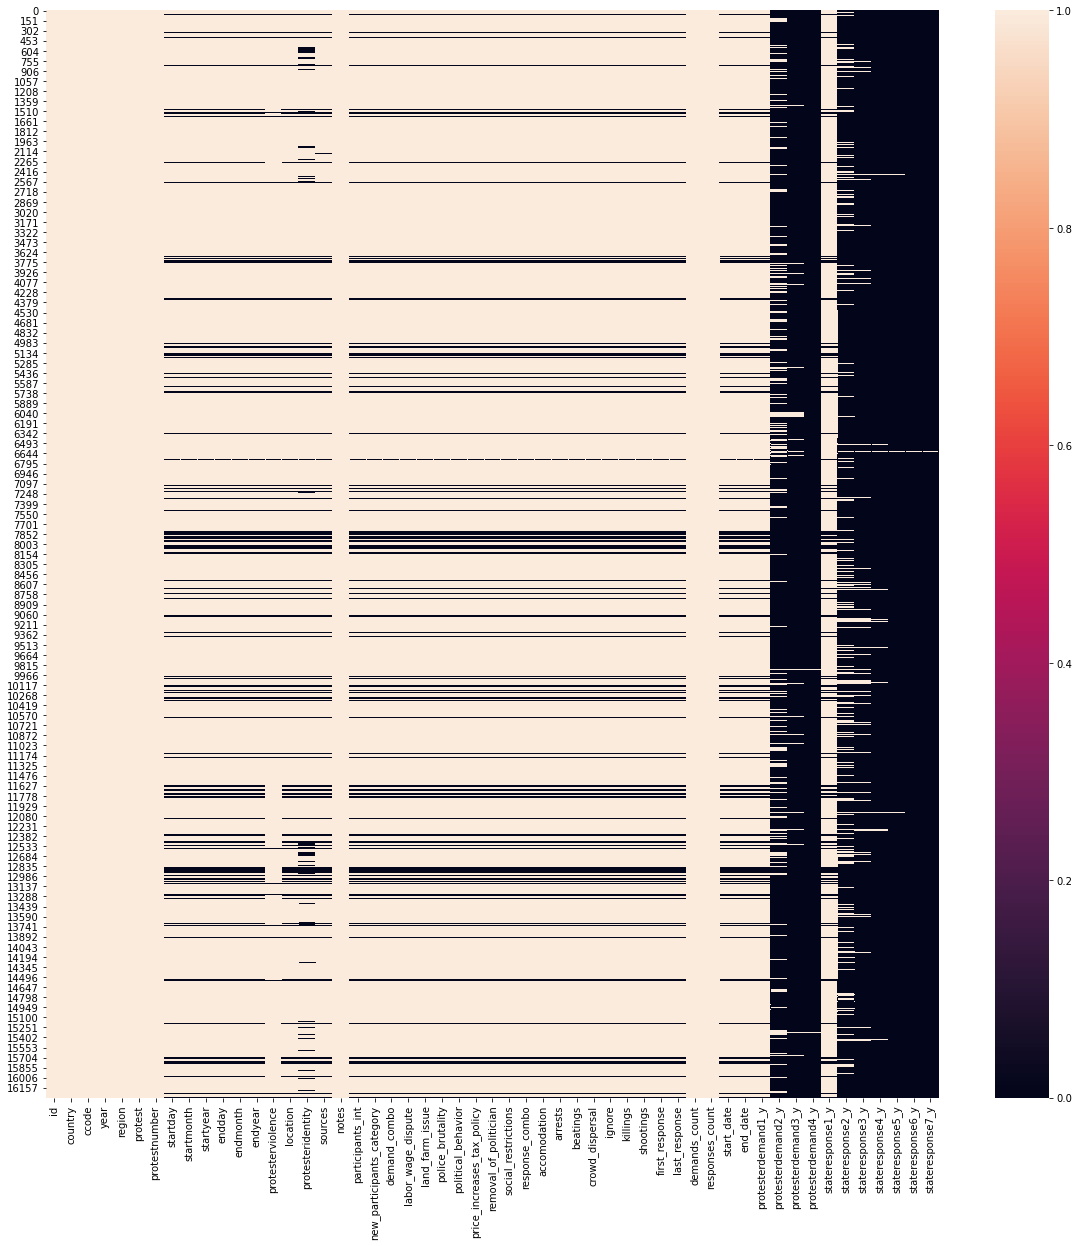

In [117]:
plt.figure(figsize = (20,20))
sns.heatmap(df2.notna())
plt.show()

In [118]:
df2.location.replace(to_replace = "national", value="nationwide", inplace=True)

In [119]:
df2.location.replace(to_replace = "national level", value="nationwide", inplace=True)

In [120]:
df2['location'].value_counts()

nationwide                      752
Athens                          226
Dublin                          218
National                        218
Seoul                           217
                               ... 
athens                            1
Milan, Florence                   1
Gorlovka                          1
Bonn, Mannheim and Gottingen      1
Kochkor  eastern Kyrgyzstan       1
Name: location, Length: 4263, dtype: int64

In [ ]:
#df2.info()

In [121]:
df2.dropna(axis = 0, subset = ['stateresponse1_y','stateresponse2_y','stateresponse3_y','stateresponse4_y','stateresponse5_y','stateresponse6_y','stateresponse7_y'], thresh= 1).shape

(14482, 53)

Dropping any row that does not have a state response

In [122]:
df2.dropna(axis = 0, subset = ['stateresponse1_y','stateresponse2_y','stateresponse3_y','stateresponse4_y','stateresponse5_y','stateresponse6_y','stateresponse7_y'], thresh= 1, inplace=True)

In [123]:
df2.isna().sum()

id                                0
country                           0
ccode                             0
year                              0
region                            0
protest                           0
protestnumber                     0
startday                          0
startmonth                        0
startyear                         0
endday                            0
endmonth                          0
endyear                           0
protesterviolence                 0
location                         20
protesteridentity               554
sources                           4
notes                             0
participants_int                 17
new_participants_category        17
demand_combo                      0
labor_wage_dispute                0
land_farm_issue                   0
police_brutality                  0
political_behavior                0
price_increases_tax_policy        0
removal_of_politician             0
social_restrictions         

In [124]:
df2.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand2_y,protesterdemand3_y,protesterdemand4_y,stateresponse1_y,stateresponse2_y,stateresponse3_y,stateresponse4_y,stateresponse5_y,stateresponse6_y,stateresponse7_y
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN


In [125]:
df2.to_csv('df.csv', index=False)